In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv("./datasets/fixed_battery_log.csv")
fixed_df = df.drop(df.columns[0],axis=1)
fixed_df["date"] = pd.to_datetime(fixed_df["date"])

In [3]:
users = fixed_df["User"].unique()
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [4]:
templates=[]
for user in users:
    print(user)
    user_df = fixed_df.loc[(fixed_df["User"] == user) & (fixed_df["date"] > dt.datetime(2022,1,1)) & (fixed_df["date"] < dt.datetime(2022,1,31)) ]
    count_list = np.empty((len(user_df["date"].dt.date.unique()),24))

    for q in range(len(user_df["date"].dt.date.unique())):
        a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
        a_day_data.set_index("date",inplace=True)
    #     print("q :",q)
    #     print("before",count_list[q])
        for i in range(0,24):
            if i == 23:
                s_time = "23:00:00"
                e_time = "23:59:59"
    #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
            else:
                s_time = "{}:00:00".format(i)
                e_time = "{}:00:00".format(i+1)
    #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
    #     print("after ",count_list[q])
    template = count_list.copy()
    np.place(template,template == 0,np.nan)
    template = np.nanmean(template,axis=0)
    template = np.nan_to_num(template)
    templates.append(template)

Narita


<ipython-input-4-f6f19bed5dcb>:26: RuntimeWarning: Mean of empty slice
  template = np.nanmean(template,axis=0)


Yusuke
Ayumi
Daiki
Shunya
Hayate
Moriyama
Isshin


In [5]:
templates

[array([1.        , 2.        , 0.        , 0.        , 0.        ,
        1.        , 1.33333333, 1.        , 1.42857143, 1.14285714,
        1.16666667, 1.125     , 2.        , 1.5       , 1.3       ,
        1.11111111, 1.9       , 1.1       , 1.09090909, 1.33333333,
        1.        , 1.        , 1.14285714, 1.6       ]),
 array([1.        , 1.28571429, 1.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.2       , 1.        , 1.        ,
        1.        , 1.16666667, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.75      , 1.        , 0.        , 0.        , 0.        ,
        2.        , 0.        , 0.        , 1.        , 1.22222222,
        1.21428571, 1.66666667, 1.85714286, 1.81818182, 1.8       ,
        1.2       , 1.        , 1.4       , 2.        , 1.        ,
        2.2       , 1.16666667, 1.33333333, 1.4       ]),
 array([1.

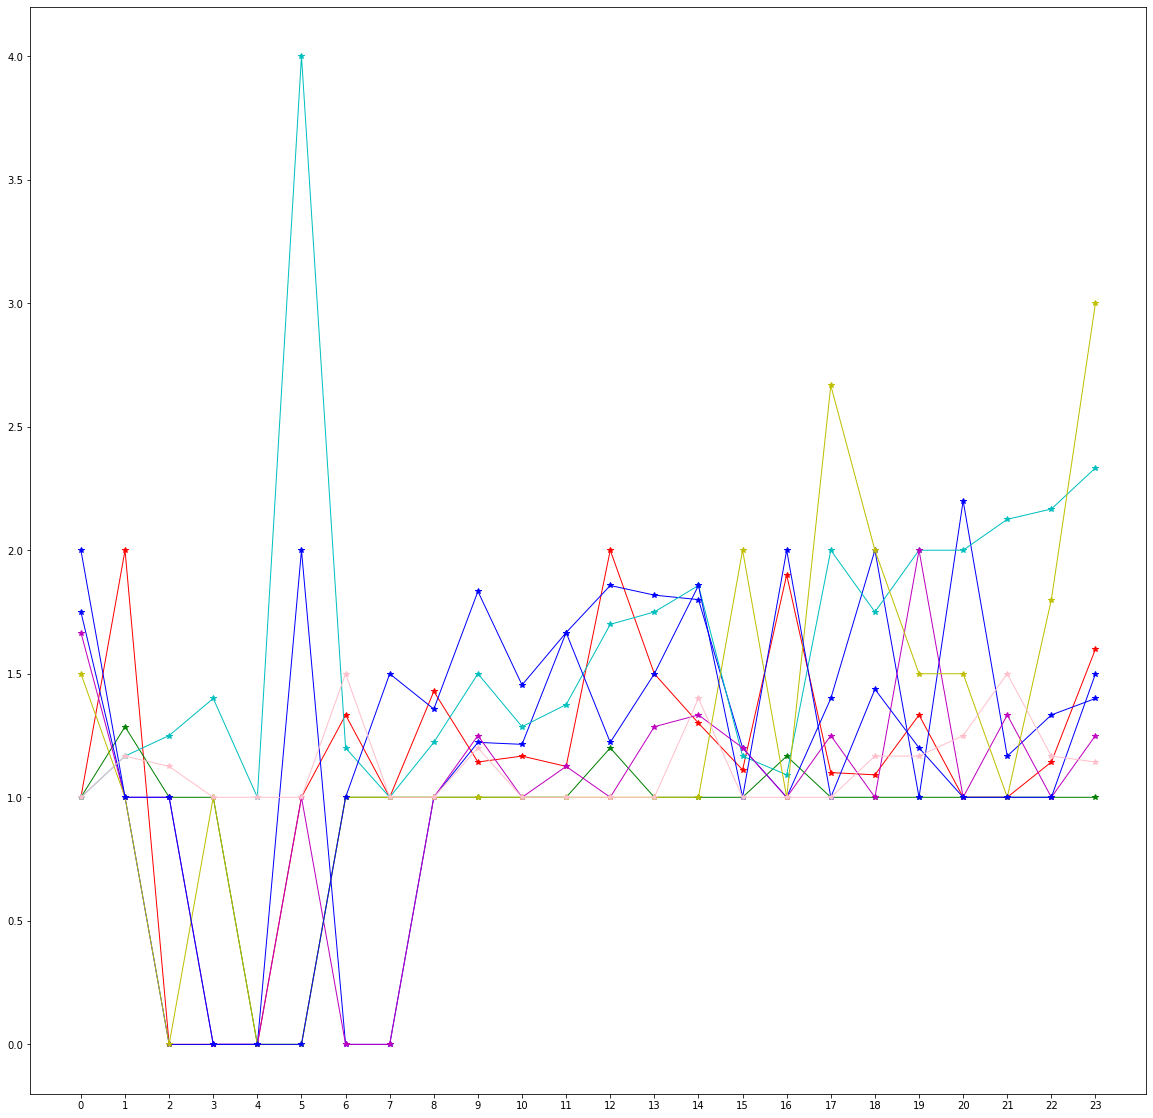

In [6]:
fig = plt.figure(figsize=[20,20])
x = [x for x in range(0,24)]
ax = fig.add_subplot(1,1,1)
colors = ["r","g","b","c","m","y","b","pink"]
for i in range(len(templates)):
    ax.plot(x, templates[i], "-", c=colors[i], linewidth=1,marker="*")

ax.set_xticks(x)
# fig.savefig("tempaltes.jpg")
plt.show()

In [34]:
narita_diff_data = np.zeros((0,0))
narita_diff_data

array([], shape=(0, 0), dtype=float64)

In [38]:
for g in range(1,31):
    user_df = fixed_df.loc[(fixed_df["User"] == "Narita") & (fixed_df["date"] > dt.datetime(2021,12,g)) & (fixed_df["date"] < dt.datetime(2022,12,g+1)) ]
    count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
    
    for q in range(len(user_df["date"].dt.date.unique())):
        a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
        a_day_data.set_index("date",inplace=True)
    #     print("q :",q)
    #     print("before",count_list[q])
        for i in range(0,24):
            if i == 23:
                s_time = "23:00:00"
                e_time = "23:59:59"
    #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
            else:
                s_time = "{}:00:00".format(i)
                e_time = "{}:00:00".format(i+1)
    #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
    #     print("after ",count_list[q])
    data_24h = count_list.copy()
    np.place(data_24h,data_24h == 0,np.nan)
    data_24h = np.nanmean(data_24h,axis=0)
    data_24h = np.nan_to_num(data_24h)
    narita_diff_data = np.append(narita_diff_data,np.linalg.norm(templates[0]-data_24h,2))

<ipython-input-38-c998294f8bef>:24: RuntimeWarning: Mean of empty slice
  data_24h = np.nanmean(data_24h,axis=0)


In [9]:
narita_diff_data

array([2.49725307, 2.49725307, 2.49725307, 2.49725307, 3.35042873,
       3.35042873, 3.35042873, 3.35198363, 3.35198363, 3.35102001,
       3.35617704, 3.35405729, 3.35135968, 3.35156162, 3.35819436,
       3.35295847, 3.35241524, 3.35368891, 3.35460026, 3.32599692,
       3.32272155, 3.32232221, 3.31635994, 3.31635994, 3.31364368,
       3.31132875, 3.30966869, 3.30867802, 3.31428667, 3.31428667])

In [10]:
narita_diff_data.mean()

3.2251983883884763

In [11]:
others_diff_data = []

for user in users:
    other_diff_data = np.zeros((0,0))
    for g in range(1,31):
        user_df = fixed_df.loc[(fixed_df["User"] == user) & (fixed_df["date"] > dt.datetime(2021,12,g)) & (fixed_df["date"] < dt.datetime(2022,12,g+1)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
        
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)
        #     print("q :",q)
        #     print("before",count_list[q])
            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        #     print("after ",count_list[q])
        data_24h = count_list.copy()
        np.place(data_24h,data_24h == 0,np.nan)
        data_24h = np.nanmean(data_24h,axis=0)
        data_24h = np.nan_to_num(data_24h)
        other_diff_data = np.append(other_diff_data,np.linalg.norm(templates[0]-data_24h))
    others_diff_data.append(other_diff_data)

<ipython-input-11-d5a19e022064>:28: RuntimeWarning: Mean of empty slice
  data_24h = np.nanmean(data_24h,axis=0)


In [ ]:
others_diff_data

In [13]:
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [22]:
narita_diff_data

array([2.49725307, 2.49725307, 2.49725307, 2.49725307, 3.35042873,
       3.35042873, 3.35042873, 3.35198363, 3.35198363, 3.35102001,
       3.35617704, 3.35405729, 3.35135968, 3.35156162, 3.35819436,
       3.35295847, 3.35241524, 3.35368891, 3.35460026, 3.32599692,
       3.32272155, 3.32232221, 3.31635994, 3.31635994, 3.31364368,
       3.31132875, 3.30966869, 3.30867802, 3.31428667, 3.31428667])

range(0, 861)


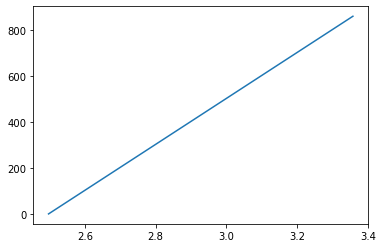

In [31]:
x = np.arange(narita_diff_data.min(),narita_diff_data.max(),0.001)
y = range(len(x))
print(y)
plt.plot(x,y)
plt.show()

In [27]:
print(narita_diff_data.mean())

3.2251983883884763


In [ ]:
success = np.zeros((0,0))
for i in x:
    sucess = np.append(success,np.sum(narita_diff_data < i))
    print("閾値: ",i,"sucess: ",np.sum(narita_diff_data < i))

In [47]:
users_test = users.copy()
users_test

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [48]:
users_test_rm = users_test[~(users_test == "Narita")]
users_test_rm

array(['Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate', 'Moriyama',
       'Isshin'], dtype=object)

In [49]:
users_test

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [50]:
def user_templates(users,df):
    templates=[]
    for user in users:
        print(user)
        user_df = df.loc[(df["User"] == user) & (df["date"] > dt.datetime(2022,1,1)) & (df["date"] < dt.datetime(2022,1,31)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
    
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)
        #     print("q :",q)
        #     print("before",count_list[q])
            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        #     print("after ",count_list[q])
        template = count_list.copy()
        np.place(template,template == 0,np.nan)
        template = np.nanmean(template,axis=0)
        template = np.nan_to_num(template)
        templates.append(template)
    return templates

In [86]:
len(users_test_rm)

7

In [108]:
def pick_up_data_from_other_user_templates(right_user,users,df):
    templates = []
    others = users.copy()
    others = others[~(others == right_user)]
    print(others)
    for other in others:
        print(other)
        user_df = df.loc[(df["User"] == other) & (df["date"] > dt.datetime(2022,1,1)) & (df["date"] < dt.datetime(2022,1,31)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
    
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)
        #     print("q :",q)
        #     print("before",count_list[q])
            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
        #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        #     print("after ",count_list[q])
        template = count_list.copy()
        np.place(template,template == 0,np.nan)
        template = np.nanmean(template,axis=0)
        template = np.nan_to_num(template)
        templates.append(template)
        print(template)
    return np.random.choice(np.array(templates).ravel(),24)

In [109]:
aaa = pick_up_data_from_other_user_templates("Narita",users,fixed_df)

['Yusuke' 'Ayumi' 'Daiki' 'Shunya' 'Hayate' 'Moriyama' 'Isshin']
Yusuke


<ipython-input-108-1d211a2c99e4>:30: RuntimeWarning: Mean of empty slice
  template = np.nanmean(template,axis=0)


[1.         1.28571429 1.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.2        1.         1.         1.         1.16666667 1.
 1.         1.         1.         1.         1.         1.        ]
Ayumi
[1.75       1.         0.         0.         0.         2.
 0.         0.         1.         1.22222222 1.21428571 1.66666667
 1.85714286 1.81818182 1.8        1.2        1.         1.4
 2.         1.         2.2        1.16666667 1.33333333 1.4       ]
Daiki
[1.         1.16666667 1.25       1.4        1.         4.
 1.2        1.         1.22222222 1.5        1.28571429 1.375
 1.7        1.75       1.85714286 1.16666667 1.09090909 2.
 1.75       2.         2.         2.125      2.16666667 2.33333333]
Shunya
[1.66666667 1.         1.         0.         0.         1.
 0.         0.         1.         1.25       1.         1.125
 1.         1.28571429 1.33333333 1.2        1.         1.25
 1.         2.         1.         1.33333333 1.     

In [105]:
aaa

array([1.8       , 1.        , 1.        , 4.        , 1.14285714,
       1.28571429, 1.        , 1.        , 1.22222222, 1.        ,
       1.        , 1.8       , 0.        , 1.16666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 2.        ,
       1.        , 1.        , 0.        , 2.2       ])

In [ ]:
def right_user_template(right_user,users,df):
    for g in range(1,31):
        user_df = df.loc[(df["User"] == user) & (df["date"] > dt.datetime(2021,12,g)) & (df["date"] < dt.datetime(2022,12,g+1)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
    
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)

            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        data_24h = count_list.copy()
        np.place(data_24h,data_24h == 0,np.nan)
        data_24h = np.nanmean(data_24h,axis=0)
        data_24h = np.nan_to_num(data_24h)
        right_user_diff_ = np.append(right_user_diff_data,np.linalg.norm(templates[user_id]-data_24h,2))
    return right_user_diff_data

In [ ]:
def pick_up_data_from_other_user_templates(right_user,users,df):
    templates = []
    others = users.copy()
    others = others[~(others == right_user)]
    print(others)
    for other in others:
        print(other)
        user_df = df.loc[(df["User"] == other) & (df["date"] > dt.datetime(2022,1,1)) & (df["date"] < dt.datetime(2022,1,31)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
    
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)
            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        template = count_list.copy()
        np.place(template,template == 0,np.nan)
        template = np.nanmean(template,axis=0)
        template = np.nan_to_num(template)
        templates.append(template)
    return np.random.choice(np.array(templates).ravel(),24)

In [ ]:
def diff_right_user(user,df,template):
    right_user_diff_data = np.zeros((0,0))
    for g in range(1,31):
        user_df = df.loc[(df["User"] == user) & (df["date"] > dt.datetime(2021,12,g)) & (df["date"] < dt.datetime(2022,12,g+1)) ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()),24))
        
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]]
            a_day_data.set_index("date",inplace=True)
            for i in range(0,24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i+1)
                    count_list[q][i] = len(a_day_data.between_time(s_time,e_time))
        data_24h = count_list.copy()
        np.place(data_24h,data_24h == 0,np.nan)
        data_24h = np.nanmean(data_24h,axis=0)
        data_24h = np.nan_to_num(data_24h)
        right_user_diff_data = np.append(right_user_diff_data,np.linalg.norm(template-data_24h,2))
    return right_user_diff_data